In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [29]:
inspector = inspect(engine)

In [36]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [133]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
session.query(measurement.date).\
    filter(measurement.date > '2016-8-23').order_by(measurement.date).all()

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, func.avg(measurement.prcp)]

Yr_query = session.query(*sel).\
    filter(measurement.date > '2016-12-31').group_by(measurement.date).order_by(measurement.date).all()

[('2017-01-01', 0.06999999999999999),
 ('2017-01-02', 0.004),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.03),
 ('2017-01-05', 0.15833333333333333),
 ('2017-01-06', 0.13333333333333333),
 ('2017-01-07', 0.01),
 ('2017-01-08', 0.01),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.002),
 ('2017-01-15', 0.0025),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.011666666666666667),
 ('2017-01-19', 0.0033333333333333335),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.04666666666666666),
 ('2017-01-22', 0.20400000000000001),
 ('2017-01-23', 0.188),
 ('2017-01-24', 0.45),
 ('2017-01-25', 0.716),
 ('2017-01-26', 0.015714285714285715),
 ('2017-01-27', 0.008571428571428572),
 ('2017-01-28', 0.028000000000000004),
 ('2017-01-29', 0.2475),
 ('2017-01-30', 0.008333333333333333),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', 0.0),
 ('2017-02-05', 0.0),
 ('2017

In [134]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Yr_query_df = pd.DataFrame(yr_query, columns = ['Date', 'Precipitation'])
Yr_query_df.set_index('Date', inplace =True)

# Sort the dataframe by date
#Yr_query_df['Date'] = pd.to_datetime(Yr_query_df['Date'])
Yr_query_df.sort_values(by='Date', ascending=True)

Yr_query_df.head(1000)


,Precipitation
Date,
2017-01-01,0.00
2017-01-01,0.29
2017-01-01,0.00
2017-01-01,NaN
2017-01-01,0.03
...,...
2017-06-12,0.24
2017-06-12,0.81
2017-06-13,0.00


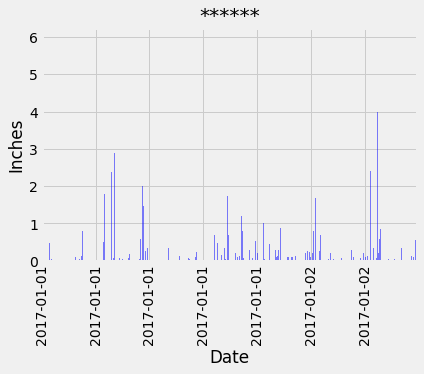

In [132]:
# Use Pandas Plotting with Matplotlib to plot the data

ax=plt.subplot(111)
ax.set_xticklabels(Yr_query_df.index, rotation = 'vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Precipitation))
x_axis = np.arange(len(Yr_query_df))
Precipitation = Yr_query_df['Precipitation']
plt.bar(x_axis, Precipitation, color = 'b', alpha=0.5, align='edge')
plt.title("******")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()